**Projet : Détermiation des paramètres physico-chimiques importants pour la qualité du vin et création d’un modèle de prédiction.**


**Problématique:**

Le vin fait parti des boissons luxeueuses les plus vendues au monde.
Cependant sa production necessite beaucoup d’argent et la bonne qualité de vin produit n’est pas quelque chose qui peut être facilement garantie.
Si les choses ne sont pas bien faites lors de la production, vous risquez de perdre beaucoup d’argent car votre vin ne sera pas certifié de bonne qualité
Alors le problème qui se pose est: D’une part comment amélioré le score de qualité du vin (avoir bonne certification) et d’autre part comment aider les producteurs à anticiper sur la qualité de leurs vins afin d’avoir un meilleur chiffre d’affaire.

**Data Mining et Machine Learning :**

En appliquant les techniques de data mining sur les données physico-chimiques du vin, on peut d’une part extraire de ces données bruts des informations utiles permettant de comprendre la relation entre les paramètres physico-chimiques du vin et sa qualité.

**Démarche:**

Dans ce projet, nous allons construire un modèle de  Machine learning pour prédire le score de qualité d’un vin.
L’objectif est de trouver les attributs necessaires pour fabriquer un vin de qualité afin d’aider les producteurs à optimiser leurs efforts.


Pour traiter ce projet nous allons suivre les étapes suivantes:
  * Compréhension de la problématique Business;
  * collecte des données ;
  * analyse exploratoire;
  * Prétraitement des données;
  * Modélisation;
  * Résultats et Conclusion.


1. ANALYSE EXPLORATOIRE DES DONNEES

    Importation des données et importation des librairies

In [1]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# récupérer l'ensemble de données sur la librairie UCI
wine_quality = fetch_ucirepo(id=186)

print(wine_quality)

{'data': {'ids': None, 'features':       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0               7.4              0.70         0.00             1.9      0.076   
1               7.8              0.88         0.00             2.6      0.098   
2               7.8              0.76         0.04             2.3      0.092   
3              11.2              0.28         0.56             1.9      0.075   
4               7.4              0.70         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
6492            6.2              0.21         0.29             1.6      0.039   
6493            6.6              0.32         0.36             8.0      0.047   
6494            6.5              0.24         0.19             1.2      0.041   
6495            5.5              0.29         0.30             1.1      0.022   
6496            6.0              0.21         0.38             0.8      0.

# Explication des variables du jeu de données

Les variables indépendantes (basées sur des test physico-chimiques) :
  - fixed acidity : acidité fixe
  - volatile acidity : l’acidité volatile
  - citric acid : acide citrique
  - residual sugar : sucre résiduel
  - chlorides : chlorures
  - free sulfur dioxide : dioxyde de soufre libre
  - total sulfur dioxide : dioxyde de soufre total
  - density : Densité
  - pH : pH
  - sulphates : sulfates
  - alcohol :  Alcool
  
La variable dépendante (score de qualité) :
  - quality (score between 0 and 10) : Qualité (score allant de 0 à 10, qui correspond respectivement à une qualité très mauvaise et à une qualité excellente)

# Faut noter que le jeu de données que nous voulons étudier est un regroupement de deux jeu de données issu de deux types de vin (red = rouge et white = blanc).

# IMPORTATION DES LIBRAIRIES

In [54]:
# Importation des librairies

import numpy as np #Pour les calculs numériques
import pandas as pd #Pour la manipulation et l’analyse de données tabulaires
import matplotlib.pyplot as plt #Pour la visualisation des données
import seaborn as sns #Pour la visualisation des données

import warnings
warnings.filterwarnings('ignore') #Pour masquer les avertissements (warnings) lors de l’exécution de votre code

from sklearn.preprocessing import StandardScaler #Pour Standardiser les données
from sklearn.model_selection import cross_val_score #Pour effectuer la validation croisée
from sklearn.model_selection import StratifiedKFold #Pour effectuer la validation croisée stratifiée
from sklearn.model_selection import train_test_split #Pour diviser les données en ensembles d’entraînement et de test

from sklearn.linear_model import LogisticRegression #Pour l’entraînement d’un modèle de régression logistique
from sklearn.svm import SVR #Pour l’entraînement d’un modèle de support vectoriel
from sklearn.ensemble import RandomForestRegressor #Pour l’entraînement d’un modèle de forêt aléatoire

from sklearn.metrics import mean_squared_error #Pour calculer l’erreur quadratique moyenne (MSE)

In [15]:
# Lecture des jeux de données

df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [17]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [18]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [19]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [82]:
# Fusion des deux jeux de données
  ## Pour cela nous allons créer une variable "type_vin" qui prendra en charge la couleur du vin

df_red['type_vin'] = 1
df_white['type_vin'] = 0

In [83]:
# Fusion des deux jeux de données

df = pd.concat([df_red, df_white])
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_vin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type_vin              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


# ANALYSE EXPLORATOIRE DU JEU DE DONNEES

In [85]:
# Résumé statistique du jeu de données

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_vin
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


On peut voir à travers le résumé statistique que les variables ne sont pas à la même échelle

In [86]:
# Gestion des valeurs manquantes
## Vérification

df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Le jeu de données n'as pas de valeurs manquantes

In [87]:
# Fréquences et modalités de la variable cible

df['quality'].value_counts(normalize=True)

,proportion
quality,
6,0.436509
5,0.329075
7,0.166077
4,0.033246
8,0.029706
3,0.004618
9,0.000770


Vérifions comment se comportent les variables numériques

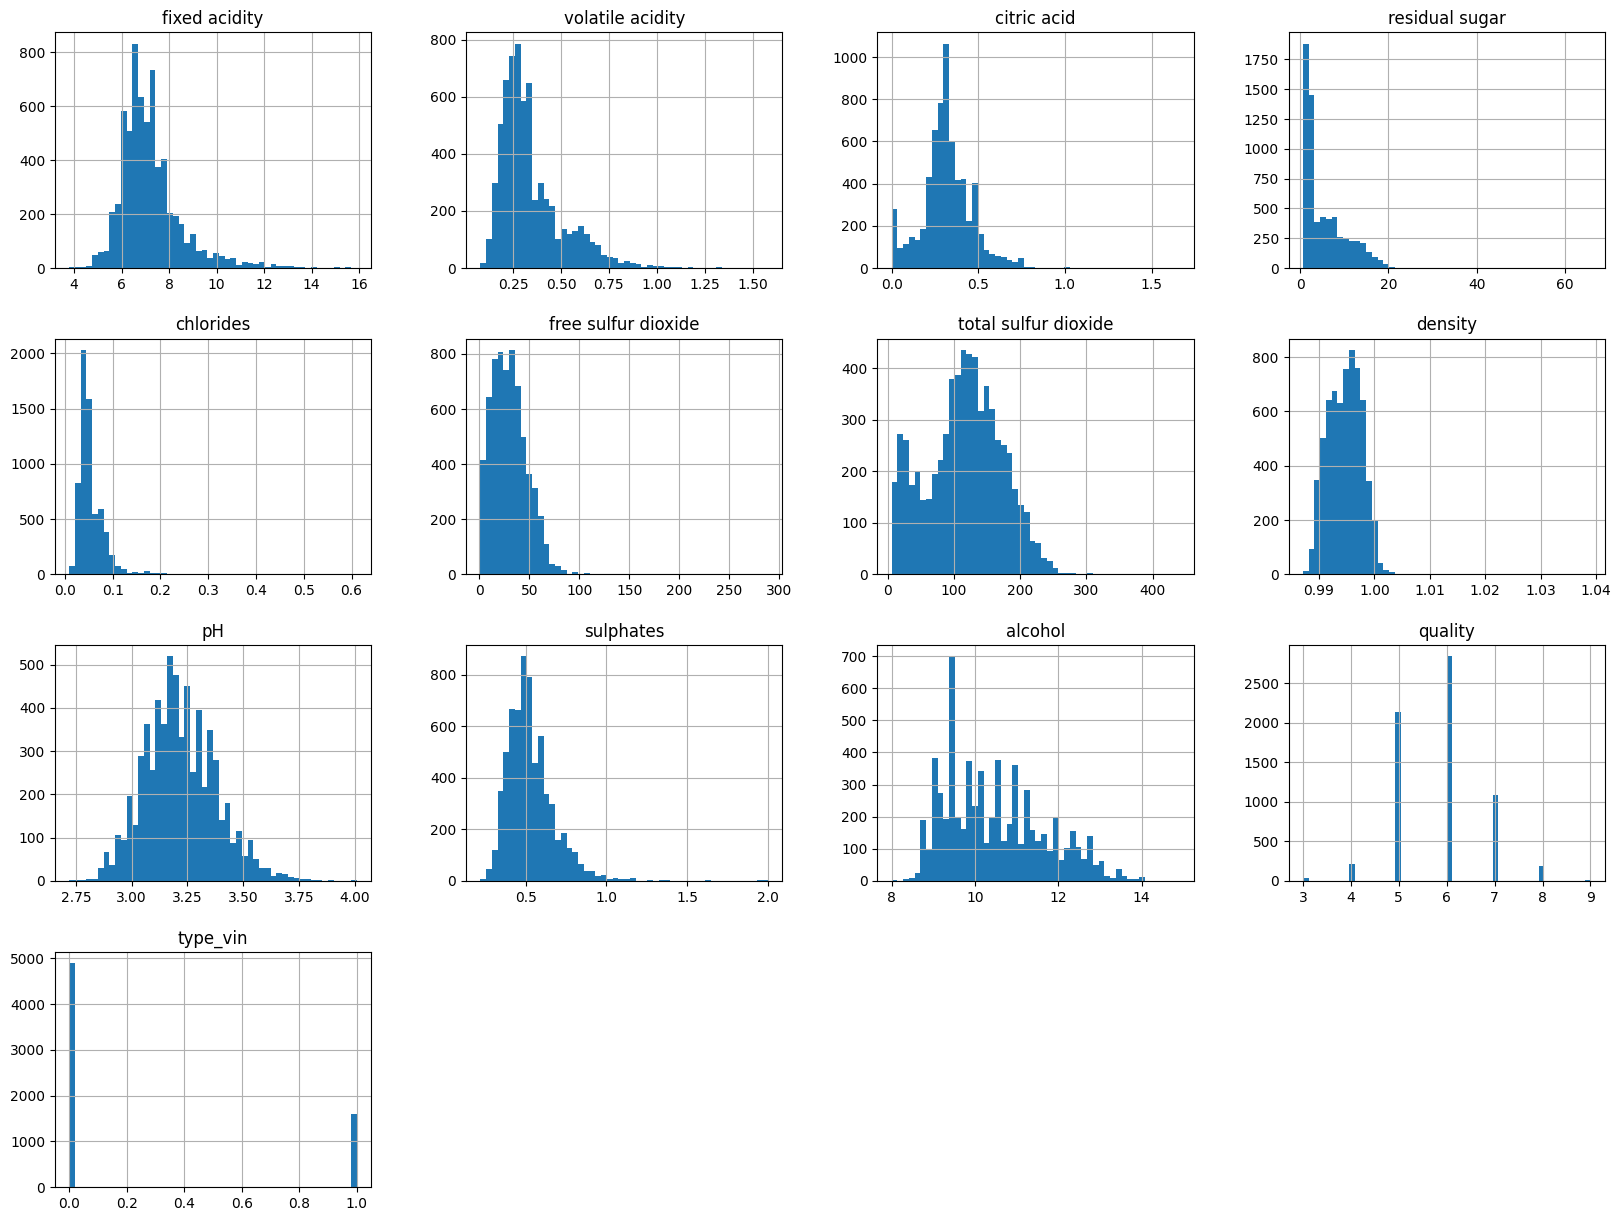

In [88]:
# Histagrammes des variables

df.hist(bins=50, figsize=(20,15))
plt.show()

Hypotèse : On va supposer dans notres cas qu'un vin de bonne qualité (très bonne qualité à excellente qualité) à un score de qualité >= 7 et un vin de mauvaise qualité à un score de qualité < 7
Dans ce cas il serait interessant de comparer les statiques des varibles de ces deux groupesde vin:

In [89]:
# Filtrons notre jeu de données en deux groupes

df_good = df[df['quality'] >= 7]
df_bad = df[df['quality'] < 7]

In [90]:
# Résumé statistique de ces deux groupes

df_good.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_vin
count,1277.000000,1277.00000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000,1277.000000
mean,7.085709,0.28917,0.334628,4.827721,0.044576,31.055208,109.891151,0.993027,3.227651,0.541488,11.433359,7.158966,0.169930
std,1.342832,0.11696,0.110040,4.063824,0.021014,15.344154,47.126201,0.003007,0.159094,0.161521,1.215620,0.376348,0.375718
min,3.900000,0.08000,0.000000,0.800000,0.012000,3.000000,7.000000,0.987110,2.840000,0.220000,8.500000,7.000000,0.000000
25%,6.300000,0.20000,0.280000,1.800000,0.033000,20.000000,87.000000,0.990720,3.120000,0.420000,10.700000,7.000000,0.000000
50%,6.900000,0.27000,0.320000,2.900000,0.039000,31.000000,114.000000,0.992280,3.220000,0.510000,11.500000,7.000000,0.000000
75%,7.400000,0.34000,0.380000,6.500000,0.051000,40.000000,140.000000,0.995000,3.340000,0.640000,12.400000,7.000000,0.000000
max,15.600000,0.91500,0.760000,19.250000,0.358000,108.000000,289.000000,1.003200,3.820000,1.360000,14.200000,9.000000,1.000000


In [91]:
df_bad.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_vin
count,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000,5220.000000
mean,7.247011,0.352019,0.314720,5.593812,0.058837,30.395690,117.176533,0.995105,3.216262,0.528768,10.261462,5.490421,0.264751
std,1.282968,0.172094,0.152466,4.901269,0.037145,18.288715,58.506354,0.002852,0.161135,0.145434,1.067408,0.605987,0.441243
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987220,2.720000,0.230000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.040000,16.000000,74.000000,0.993000,3.110000,0.430000,9.400000,5.000000,0.000000
50%,7.000000,0.300000,0.300000,3.000000,0.049000,28.000000,119.000000,0.995400,3.200000,0.510000,10.000000,6.000000,0.000000
75%,7.700000,0.430000,0.400000,8.300000,0.069000,42.000000,160.000000,0.997200,3.320000,0.590000,11.000000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,6.000000,1.000000


INTERPRETATION:

- Acidité fixe
- Acidité volatille
- Acide citrique
- sucre résiduel
- chlorures :
- dioxyde de soufre libre :
- dioxyde de soufre total :
- densité :
- pH :
- sulfates :
- alcool :
- qualité :

Vérification des correlations de variable

In [92]:
# Vérification des correlations de variable

df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_vin
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218


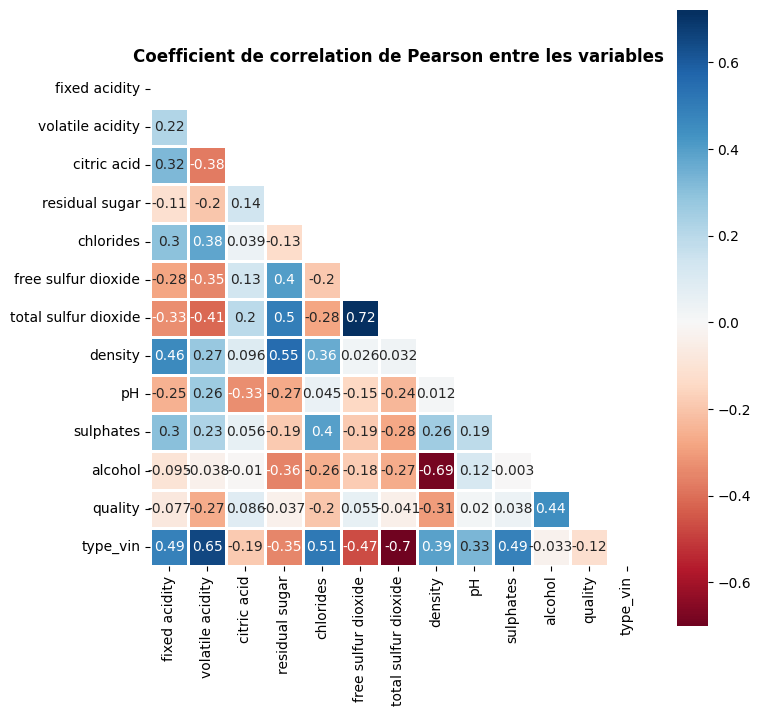

In [93]:
# Matrix de correlation

plt.figure(figsize=(8,8))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask,center=0, cmap='RdBu', linewidths=1, annot=True, square=True)
plt.title('Coefficient de correlation de Pearson entre les variables', fontweight='bold')
plt.show()

  # PRETRAITEMENT

In [94]:
# Division du jeu de donnée en données d'entrainement et de test

X = df.drop('quality', axis=1)
y = df['quality']

seed = 33 #Pour s'assurer de la reproductibilité des résultats

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 12)
(1300, 12)
(5197,)
(1300,)


In [95]:
# Standardisation du jeu de données

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [96]:
X_train_scaled

array([[ 0.38106424, -0.42333744,  0.152051  , ..., -0.35328639,
         1.35085185, -0.57046226],
       [ 1.62710737,  1.9359534 , -0.40374927, ..., -0.75380179,
        -0.74429444,  1.75296435],
       [-1.56587815,  0.15882524, -1.65429985, ..., -0.9540595 ,
        -0.49287688, -0.57046226],
       ...,
       [ 1.23771889,  0.80226819,  1.19417649, ...,  0.44774442,
        -0.57668273,  1.75296435],
       [-1.33224506, -0.66845857, -0.89007449, ..., -0.68704923,
        -0.07384762, -0.57046226],
       [ 0.30318655, -0.05565575,  0.22152603, ..., -0.9540595 ,
         1.267046  , -0.57046226]])

La variable à prédire est une variable numérique dans nous allons utiliser un odèle de regression. Et comme métric d'évaluation nous allons choisir l'erreur quadratique moyenne vu qu'elle peut être dans le même unité que la variable cible. Cela pourra faciliter les interpretations

In [97]:
# Validations croisées des modèles

lr_cve = cross_val_score(LogisticRegression(),
                         X_train_scaled,
                         y_train,
                         cv=3,
                         scoring="neg_root_mean_squared_error")

rf_cve = cross_val_score(RandomForestRegressor(random_state=seed),
                   X_train_scaled,
                   y_train,
                   cv=3,
                   scoring="neg_root_mean_squared_error")

svm_cve = cross_val_score(SVR(),
                          X_train_scaled,
                          y_train,
                          cv=3,
                          scoring="neg_root_mean_squared_error")

In [98]:
lr_cve

array([-0.78979352, -0.79330338, -0.79075197])

In [99]:
rf_cve

array([-0.62019518, -0.63840678, -0.6369258 ])

In [100]:
svm_cve

array([-0.67342018, -0.68137323, -0.67191659])

Du score de ces trois modèles il en ressort que le modèle RandomForest est le meilleur car il a l'erreur quadratique moyenne la plus faible

D'un modèle à un autre le score n'a pas trop varié alors on peut estimer qu'il n'y a pas de problème de sur aprentissage


In [101]:
# Valeurs moyennes

print("Logistic Regression: ", lr_cve.mean())
print("Random Forest: ", rf_cve.mean())
print("SVM: ", svm_cve.mean())

Logistic Regression:  -0.7912829577795807
Random Forest:  -0.6318425906491011
SVM:  -0.6755700011223958


Notre choix sera alors porté sur le modèle RandomForest pour la construction de notre modèle prédictif

# CONSTRUCTION DU MODELE

In [102]:
# Modélisation

rf = RandomForestRegressor(random_state=seed)
rf.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=33)

In [103]:
# Prédiction à l'aide du modèle

y_pred = rf.predict(X_test_scaled)
y_pred

array([6.4 , 5.82, 6.25, ..., 5.38, 5.09, 4.98])

In [104]:
# Evaluation du modèle

print("MSE: ", mean_squared_error(y_test, y_pred, squared=False))

MSE:  0.6307860176002635


# Determination des Variables importantes

In [105]:
# Score d'importance des variables

rf.feature_importances_

array([0.05438907, 0.128995  , 0.06012551, 0.07411797, 0.06590424,
       0.08302336, 0.0727574 , 0.05769381, 0.06995162, 0.07491607,
       0.25618198, 0.00194397])

In [106]:
vars_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
vars_imp

,0
alcohol,0.256182
volatile acidity,0.128995
free sulfur dioxide,0.083023
sulphates,0.074916
residual sugar,0.074118
total sulfur dioxide,0.072757
pH,0.069952
chlorides,0.065904
citric acid,0.060126
density,0.057694


Intepretation:

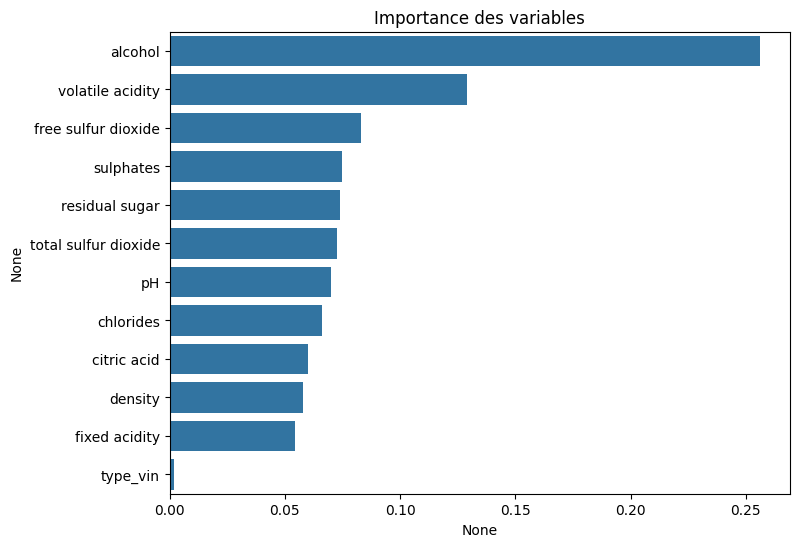

In [107]:
# Diagramme à bar des variables importantes

plt.figure(figsize=(8,6))
sns.barplot(x=vars_imp, y=vars_imp.index);
plt.title('Importance des variables')
plt.show()